# __Homework (50 points)__


- Homework must be solved in this Jupyter Notebook.

- You should rename the file as HW_YourSurname_YourFisrtName and upload it on Google classroom.


## Logistic regression

## __Part 1. Unconstraned optimization (23 points)__  

Let's consider empirical risk minimization problem (logistic regression):
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
\end{equation}
where $\ell: \mathbb{R} \times \mathbb{R} \to \mathbb{R}$ is a loss function, $g : \mathbb{R}^d \times \mathbb{R}^x \to \mathbb{R}$ is a model, $w$ is  a vector of parameters, $\{x_i, y_i\}_{i=1}^n$ is training dataset: $x_i \in \mathbb{R}^x$, $y_i \in \mathbb{R}$, and  $\lambda > 0$ is a parameter of regularization. We use linear model $g(w, x) = w^T x$ and logistic/sigmoid loss function: $\ell(z,y) = \ln (1 + e^{-yz})$

__Important__: $y$ must be $-1$ or $1$.




Let's do some preprocessing


###__а). (8 points)__
Calculate the gradient and the Hessian. Is the problem convex? Is it  $\mu$ - strongly convex? In the case of positive answer, the question is the following: how can we estimate $\mu$? Estimate the parameter of smoothness  $L$ (parameter of Lipschitzness of the gradient of the objective).

####Solution

Let's start by calculating the gradient and Hessian for the given empirical risk minimization problem.

The objective function is given by:
$$
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell(g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
$$
where $ \ell(z, y) = \ln(1 + e^{-yz}) $ and $ g(w, x) = w^Tx $.

The logistic loss function is defined as $ \ell(z, y) = \ln(1 + e^{-yz}) $, and its derivative with respect to $ z $ is given by:
$$
\frac{d\ell}{dz} = -\frac{y z' e^{-yz}}{1 + e^{-yz}}. =-\frac{y z'}{1 + e^{yz}}.
$$

Now, let's calculate the gradient of the objective function:
$$
\nabla J(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{d\ell(g(w, x_i), y_i)}{dw} + \lambda w.
$$

Since $ g(w, x) = w^Tx $, the gradient with respect to $ w $ is $ x $ when evaluating the logistic loss function's derivative:
$$
\frac{d\ell(g(w, x_i), y_i)}{dw} = -\frac{y_i x_i}{1 + e^{y_i w^Tx_i}}.
$$

So, the gradient becomes:
$$
\nabla J(w) = -\frac{1}{n} \sum\limits_{i=1}^n \frac{y_i x_i}{1 + e^{y_i w^Tx_i}} + \lambda w.
$$

Next, let's calculate the Hessian. The Hessian matrix is given by:
$$
H(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{d^2\ell(g(w, x_i), y_i)}{dw^2} + \lambda I,
$$
where $ I $ is the identity matrix.

The second derivative of the logistic loss function with respect to $ w $ is:
$$
\frac{d^2\ell(g(w, x_i), y_i)}{dw^2} = \frac{e^{y_i w^Tx_i}}{(1 + e^{y_i w^Tx_i})^2} x_i x_i^T.
$$

So, the Hessian becomes:
$$
H(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{e^{y_i w^Tx_i}}{(1 + e^{y_i w^Tx_i})^2} x_i x_i^T + \lambda I.
$$

Now, let's analyze the convexity of the problem. The Hessian matrix is a sum of positive semi-definite matrices (the first term is positive semi-definite because it involves exponentials). The regularization term is also positive semi-definite. Therefore, the Hessian matrix is positive semi-definite, indicating convexity.

As for strong convexity, it depends on the value of the smallest eigenvalue of the Hessian matrix. If the smallest eigenvalue is greater than zero, the problem is $ \mu $-strongly convex.
$$ \mu ≥ \sigma_{min}\bigg (\frac{1}{n} X_n^TX_n + λI \bigg) $$
Estimating $ \mu $ involves computing the smallest eigenvalue $(\sigma_{min})$ of the Hessian matrix.

The Lipschitz constant is given by the following inequality:
$$ L ≤ \sigma_{max}\bigg (\frac{1}{n} X_n^TX_n + λI \bigg) $$
Estimating $ L $ involves computing the largest eigenvalue $(\sigma_{max})$ of the Hessian matrix.



Next we define matrix $X$ and vector $y$ which are the dataset $\{x_i, y_i\}_{i=1}^n$. As dataset we use dataset "_mushrooms_" attached to this homework.


In [ ]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import time

In [ ]:
import gdown
!gdown --fuzzy https://drive.google.com/file/d/16s6FMWWT1Wn8sDGBeNNv9nXivL3pMlQI/view?usp=sharing -O mushrooms.txt

Downloading...
From: https://drive.google.com/uc?id=16s6FMWWT1Wn8sDGBeNNv9nXivL3pMlQI
To: /content/mushrooms.txt
100% 880k/880k [00:00<00:00, 8.19MB/s]


In [ ]:
dataset = "mushrooms.txt"

from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

Change $y$ so that it takes values $-1$ and $1$.



In [ ]:
y = 2 * y - 3

Let's divide the data into two parts: training and testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###__b). (4 points)__
For training dataset $X_{train}$, $y_{train}$ estimate constant $L$. Implement the gradient and the  Hessian computation.
Set $\lambda \approx \frac{L}{1000}$.

 Use $X$, $y$, $\lambda$  as parameters so that they can be changed.



In [ ]:
def objective_logistic(X, y, w, lambda_val):
    n, _ = X.shape
    obj_val = (1 / n) * np.sum(np.log(1 + np.exp(-y * np.dot(X, w)))) + (lambda_val/2) * np.linalg.norm(w)**2
    return obj_val

def logistic_loss_gradient(X, y, w, lambda_val):
    n = len(y)
    yz = y * np.dot(X, w)
    exp_term = np.exp(yz)

    gradient = -1/n * np.dot(X.T, y / (1 + exp_term)) + lambda_val * w

    return gradient

def hessian(X, y, w, lambda_val):
    n = len(y)
    yz = y * np.dot(X, w)
    exp_term = np.exp(yz)

    diag_matrix = np.diag(exp_term / ((1 + exp_term)**2))
    hessian = 1/n * np.dot(np.dot(X.T, diag_matrix), X) + lambda_val * np.identity(X.shape[1])

    return hessian

In [ ]:
w = np.zeros(X_train.shape[1])  # Initial guess for parameters

logistic_loss = objective_logistic(X_train, y_train, w, lambda_val=2e-3)
gradient = logistic_loss_gradient(X_train, y_train, w, lambda_val=2e-3)
hessian_evals = hessian(X_train, y_train, w, lambda_val=2e-3)

In [ ]:
# Estimate Lipschitz constant L
hessian_eigh, _ = eigh(hessian_evals)
L_estimate = np.max(hessian_eigh)
lambda_val = L_estimate/1000

print('Estimated Lipschitz constant L:', L_estimate)
print('Lambda:', lambda_val)

Estimated Lipschitz constant L: 2.5866388628722974
Lambda: 0.0025866388628722975


###__c). (4 балла)__
Implement Nesterov's gradient method (aka accelerated gradient method)


In [ ]:
def func(x, c):
    return x / (x + c)

def nesterov(X, y, lambda_val=lambda_val, mu = 0.5, momentum_const = 1, norm = False, learning_rate=0.5, max_iter=1000, tol=1e-5):
    n, d = X.shape
    w = np.zeros(d)
    y_prev = np.zeros(d)
    obj_vals = []
    gradient_norms = []
    conv = 0

    for k in range(max_iter):
        gradient = logistic_loss_gradient(X, y, w, lambda_val)
        y_next = w - learning_rate * gradient
        if 1 < momentum_const and momentum_const < 5:
          momentum = func(k, momentum_const-1)
        elif -1 <= momentum_const and momentum_const <= 1:
          momentum = momentum_const
        elif momentum_const == 5:
          momentum = (np.sqrt(L_estimate) - np.sqrt(mu)) / (np.sqrt(L_estimate) + np.sqrt(mu))

        momentum_term = momentum * (y_next - y_prev)
        w_next = y_next + momentum_term

        if np.linalg.norm(y_next - y_prev) <= tol and conv == 0:
            conv = k + 1
            print('Converged after ' + str(conv) + ' iterations')

        # Update objective function value and w
        obj_val = objective_logistic(X, y, w, lambda_val)
        obj_vals.append(obj_val)

        if norm == True:
          if k == 0:
               initial_gradient_norm = np.linalg.norm(gradient)
          gradient_norms.append(np.linalg.norm(gradient) / initial_gradient_norm)

        if np.dot(w - y_next, y_next - y_prev) > 0:
            w_next = y_next

        y_prev = y_next
        w = w_next

    if conv == 0:
        conv = k + 1
        print('Converged after ' + str(conv) + ' iterations')

    return w, obj_vals, gradient_norms

In [ ]:
# Example
w_optimal, obj_vals,_ = nesterov(X_train, y_train)

Converged after 227 iterations


In [ ]:
# Evaluate accuracy
y_pred = np.sign(X_test @ w_optimal)
accuracy = np.mean(y_pred == y_test)
print("Accuracy of Nesterov's gradient method:", accuracy)

Accuracy of Nesterov's gradient method: 0.9963076923076923


### __d). (7 points)__

Run Nesterov's gradient method for our problem on test dataset with fixed stepsize  $\frac{1}{L}$ and different values of momentum from -1 to 1, use also the following values of momentum:
$\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ is the iteration number), if the funcion is $\mu$-strongly convex then use also $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$.

Study the convergence of the method: plot the dependence $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$ on the iteration number   with different  values of momentum.


Converged after 327 iterations
Converged after 307 iterations
Converged after 313 iterations
Converged after 346 iterations


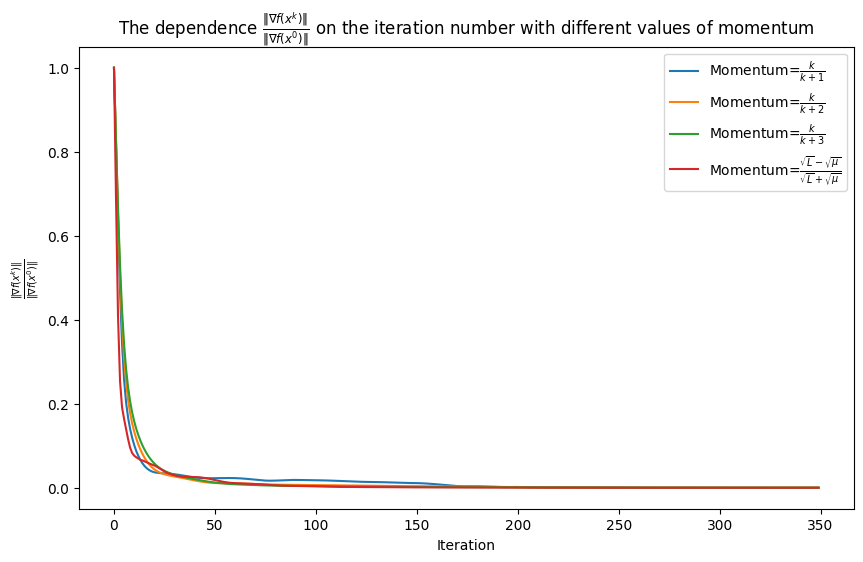

In [ ]:
# Define parameters
learning_rate = 1 / L_estimate  # Using fixed step size 1/L
mu = np.min(hessian_eigh)
momentum_const_1 = [2, 3, 4, 5]

# Run Nesterov's method for each momentum value
obj_val = {}
plt.figure(figsize=(10, 6))
for momentum in momentum_const_1:
    w_optimal, obj_val, gradient_norms = nesterov(X = X_train, y = y_train, lambda_val=lambda_val, mu = mu, momentum_const = momentum, norm = True, learning_rate=learning_rate, max_iter=350, tol=1e-5)
    plt.plot(gradient_norms)

plt.xlabel("Iteration")
plt.ylabel(r"$\frac{\|\nabla f(x^k)\|}{\|\nabla f(x^0) \|}$")
plt.title(r"The dependence $\frac{\|\nabla f(x^k)\|}{\|\nabla f(x^0) \|}$ on the iteration number with different values of momentum")
plt.legend([r'Momentum=$\frac{k}{k+1}$',r'Momentum=$\frac{k}{k+2}$',r'Momentum=$\frac{k}{k+3}$',r'Momentum=$\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$'])
plt.show()

Converged after 2 iterations
Converged after 350 iterations
Converged after 350 iterations
Converged after 350 iterations
Converged after 259 iterations


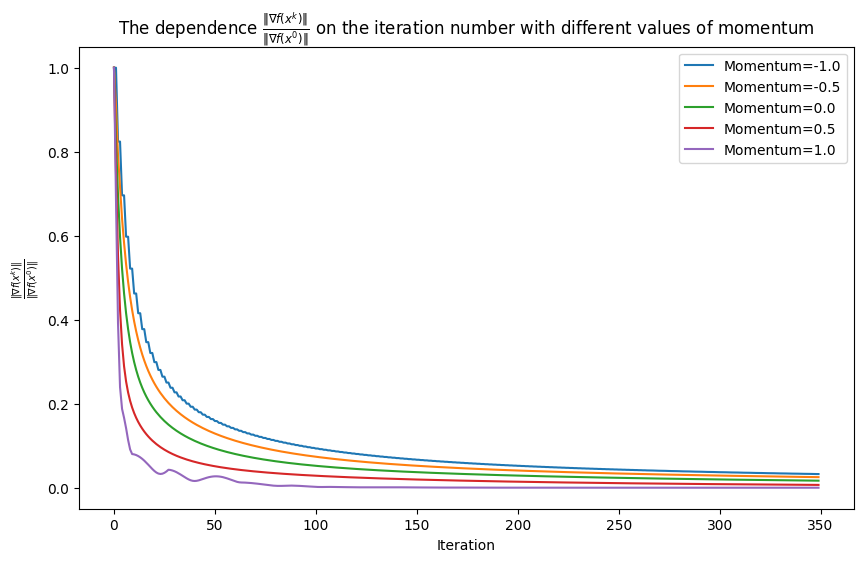

In [ ]:
# Define parameters
momentum_const_1 = np.linspace(-1, 1, 5, dtype=np.float32)

# Run Nesterov's method for each momentum value
obj_val = {}
plt.figure(figsize=(10, 6))
for momentum in momentum_const_1:
    w_optimal, obj_val, gradient_norms = nesterov(X = X_train, y = y_train, lambda_val=lambda_val, mu = mu, momentum_const = momentum, norm = True, learning_rate=learning_rate, max_iter=350, tol=1e-5)
    plt.plot(gradient_norms, label=f'Momentum={momentum}')

plt.xlabel("Iteration")
plt.ylabel(r"$\frac{\|\nabla f(x^k)\|}{\|\nabla f(x^0) \|}$")
plt.title(r"The dependence $\frac{\|\nabla f(x^k)\|}{\|\nabla f(x^0) \|}$ on the iteration number with different values of momentum")
plt.legend()
plt.show()

+ Adaptive momentums that depend on the iteration number $\frac{k}{k+m}$ appear to converge faster than some constant momentums. This suggests that adapting the momentum during the optimization process can be beneficial for faster convergence.
+ The momentum that depends on strong convexity $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ shows slightly slower convergence and more unstability.
+ Constant momentum values -1 and 1 generally help accelerate convergence, but they are noted as unstable.

## __Part 2. Constraned optimization (27 points)__

Let's consider empirical risk minimization problem (again logistic regression)  but without regularization and on the constant set $X$:
\begin{equation}
\min_{w \in \mathcal{X} \subset \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i).
\end{equation}

As $\mathcal{X}$ we use the $\ell_1$-ball with center at 0 and radius $R$: $$\mathcal{X} =\{x \in \mathbb{R}^d \mid \| x \|_1 \leq R \}.$$



As now we solve the problem on the $\ell_1$-ball, we need to use the methods that take this into account.

### __a). (1 points)__  
For training dataset $X_{train}$, $y_{train}$ estimate constant $L$.  Implement the gradient and the Hessian computation.

####Solution

To estimate the Lipschitz constant ($L$) for the logistic regression problem without regularization on the $\ell_1$-ball, we can follow a similar approach as before. We'll calculate the gradient and Hessian for the logistic regression objective, and then estimate the Lipschitz constant.

The gradient and Hessian for logistic regression without regularization are as follows:

$$
\nabla J(w) = -\frac{1}{n} \sum_{i=1}^{n} \frac{y_i x_i}{1 + e^{y_i w^Tx_i}}
$$

$$
H(w) = \frac{1}{n} \sum_{i=1}^{n} \frac{e^{y_i w^Tx_i}}{(1 + e^{y_i w^Tx_i})^2} x_i x_i^T
$$

Now, let's estimate the Lipschitz constant $L$ using the training dataset ($X_{\text{train}}$, $y_{\text{train}}$):

In [ ]:
def objective_logistic_1(X, y, w):
    return objective_logistic(X, y, w, lambda_val=0)

def logistic_loss_gradient_1(X, y, w):
    return logistic_loss_gradient(X, y, w, lambda_val=0)

def hessian_1(X, y, w):
    return hessian(X, y, w, lambda_val=0)

In [ ]:
w = np.zeros(X_train.shape[1])  # Initial guess for parameters

logistic_loss_1 = objective_logistic_1(X_train, y_train, w)
gradient_1 = logistic_loss_gradient_1(X_train, y_train, w)
hessian_evals_1 = hessian_1(X_train, y_train, w)

In [ ]:
# Estimate Lipschitz constant L
hessian_eigh, _ = eigh(hessian_evals_1)
L_estimate = np.max(hessian_eigh)
print('Estimated Lipschitz constant L:', L_estimate)

Estimated Lipschitz constant L: 2.5846388628722985


###__a). (3 points)__

For the $\ell_1$-ball with center at 0 and radius  $R$, find the expression for  solving the linear optimization problem for a given vector $g \in \mathbb{R}^d$:
$$
y = \arg \min_{y \in \mathcal{X}} \langle y, g \rangle.
$$



####Solution

The linear programming problem can be formulated as:
$$
y^* = \arg \min_{\| y \|_1 \leq R} \langle y, g \rangle = -R \bigg(\arg \max_{\| y \|_1 \leq 1} \langle y, g \rangle \bigg) = -R \partial \|g\|_{\infty}
$$
where $\partial \|g\|_{\infty}$ represents the subgradients of the $l_{\infty}$-norm of $g$.


In [ ]:
def subgradient(g, R):
    n = g.shape
    y = np.zeros(n)
    abs_g = abs(g)
    i = np.nonzero(abs_g == max(abs_g))[0][0]
    y[i] = - R * np.sign(g[i])
    return y

###__b). (3 point)__
Implement  the solution to the linear optimization problem from the previous paragraph (use the radius of the ball $R$ as a parameter). Implement the Frank-Wolff method for our problem.  Take the  stepsize as follows: if iterations are numbered starting from 0, then $\gamma = \frac{2}{k+3}$, if iterations are numbered starting from 1, then $\gamma = \frac{2}{k +2}$.

####Solution

In [ ]:
# Frank-Wolfe optimization
def frank_wolfe(X, y, R, max_iter=1000, start=0, tol=1e-6):
    n, d = X.shape
    w = np.zeros(d)
    values = []
    times = []
    conv = 0

    start_time = time.time()
    for k in range(start,max_iter):
        gradient = logistic_loss_gradient_1(X, y, w)
        value = objective_logistic_1(X, y, w)
        values.append(value)

        if k > 1:
            if abs(values[k] - values[k-1]) <= tol and conv == 0:
              conv = k + 1
              print('Converged after ' + str(conv) + ' iterations')

        step_size = 2 / (k + 3) if start==0 else 2 / (k + 2)
        direction = subgradient(gradient, R) - w
        w = w + step_size * direction
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)

    if conv == 0:
        conv = k + 1
        print('Converged after ' + str(conv) + ' iterations')

    return w, values, times

In [ ]:
# Run Frank-Wolfe method when iterations are numbered starting from 0
w_FW, values_FW, times_FW = frank_wolfe(X_train, y_train, R=5, start=0)

Converged after 198 iterations


In [ ]:
y_pred = np.sign(X_test @ w_FW)
accuracy = np.mean(y_pred == y_test)
print("Accuracy of Frank-Wolff method:", accuracy)

Accuracy of Frank-Wolff method: 0.968


###__c). (5 point)__

Solve the optimization problem on the training set using the implemented method. Take $R = 5$ and the strating point $x^0 =0$. Use the duality gap as a measure of convergence:
$$
\text{gap}(w^k) = \max_{y \in \mathcal{X}} \langle \nabla f(w^k). w^k - y \rangle,
$$
 We use the duality gap instead of the function non-optimality gap $f(w^k) - f^*$ because we do not know the true value  $f^*$ and cannot guarantee that $\nabla f(w^*) = 0$ in the constraned optimization. However it is possible to show that $\text{gap}(w^k) \geq f(w^k) - f^*$, and also prove the convergence of the Frank-Wulf method in terms of the duality gap. Therefore convergence in terms of $\text{ gap}(w^k)$  gives a good understanding of the behavior of the function non-optimality gap  $f(w^k) - f^*$.

Study the convergence of the method: plot the dependence of duality gap $\text{gap}(w^k)$ on the number of iterations.



####Solution

To calculate the duality gap in the Frank-Wolfe method, we can use the following expression:

$$
\text{gap}(w^k) = \max_{y \in \mathcal{X}} \langle \nabla f(w^k), w^k - y \rangle
$$

Let's modify the Frank-Wolfe implementation to calculate and store the duality gap at each iteration. We'll then plot the convergence in terms of the duality gap.


In [ ]:
# Calculate the duality gap for the given gradient and point w on the l1-ball
def duality_gap(gradient, w, R):
    return np.abs(np.dot(gradient, (w-subgradient(gradient, R))))

# Frank-Wolfe optimization with the duality gap
def frank_wolfe_with_gap(X, y, R=5, max_iter=1000, start=0, tol=1e-3):
    n, d = X.shape
    w = np.zeros(d)
    values = []
    times = []
    conv = 0

    start_time = time.time()
    for k in range(start,max_iter):

        gradient = logistic_loss_gradient_1(X, y, w)
        value = objective_logistic_1(X, y, w)
        values.append(value)
        gap = duality_gap(gradient, w, R)

        if k > 1:
            if abs(values[k] - values[k-1] - gap) <= tol and conv == 0:
              conv = k + 1
              print('Converged after ' + str(conv) + ' iterations')

        step_size = 2 / (k + 3) if start==0 else 2 / (k + 2)
        direction = subgradient(gradient, R) - w
        w = w + step_size * direction
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)
    if conv == 0:
        conv = k + 1
        print('Converged after ' + str(conv) + ' iterations')

    return w, values, times

In [ ]:
# Run Frank-Wolfe method with duality gap tracking
w_FW_gap1, values_FW1, times_FW1 = frank_wolfe_with_gap(X_train, y_train, R=5, start=0)

Converged after 255 iterations


In [ ]:
y_pred = np.sign(X_test @ w_FW_gap1)
accuracy = np.mean(y_pred == y_test)
print("Accuracy of Frank-Wolff method with duality gap:", accuracy)

Accuracy of Frank-Wolff method with duality gap: 0.968


### Comment
Provide the solution obtained by using the Frank-Wolff method. What unusual did you see? For greater clarity, you can solve an unconstrained problem (on $\mathbb{R}^d$) without a regularizer by  the Nesterov’s method from the previous task. Make a conclusion.


####Solution

Converged after 1000 iterations


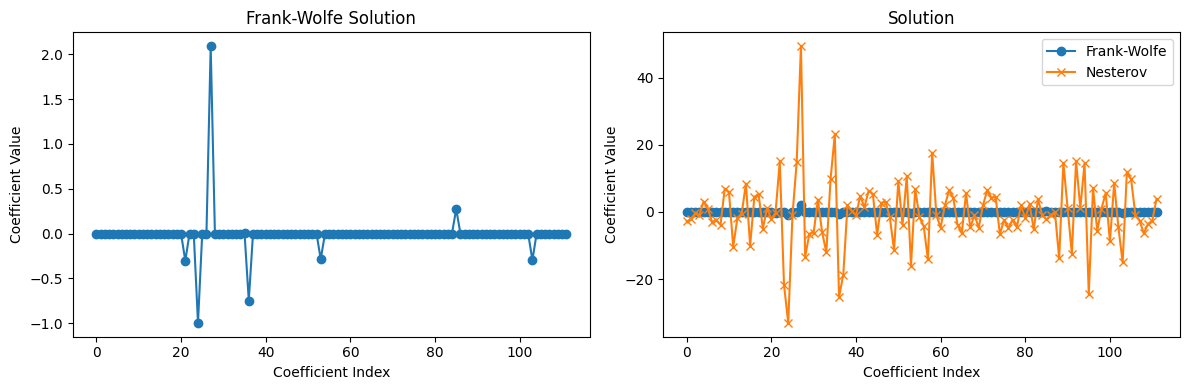

In [ ]:
# Frank-Wolfe solution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(w_FW_gap1, marker='o')
plt.title('Frank-Wolfe Solution')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')

# Nesterov solution
w_nesterov, obj_val, gradient_norms = nesterov(X = X_train, y = y_train, lambda_val=0)

# Compare solution
plt.subplot(1, 2, 2)
plt.plot(w_FW_gap1, marker='o', label='Frank-Wolfe')
plt.plot(w_nesterov, marker='x', label='Nesterov')
plt.title('Solution')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()

plt.tight_layout()
plt.show()

The unusual aspect of the Frank-Wolfe method is that the values of the solution seem to have a significant number of the coefficients are around zero. This is indicative of a sparse solution.

On the other hand, the solution obtained by Nesterov's method in the unconstrained setting doesn't exhibit this sparse pattern. The values of the solution obtained by Nesterov's method are continuous and can take non-zero values for each coefficient.

Conclusion:
+ The Frank-Wolfe method with the $\ell_1$-ball constraint tends to encourage sparsity in the solution. This is a desirable property in various applications, especially when dealing with high-dimensional data, as it effectively selects a subset of features.
+ In contrast, the unconstrained Nesterov's method may provide a more general solution with a continuous solution without requiring sparsity. This might be suitable when sparsity is not a critical requirement.

###__d).(15 points)__

The problem can also be solved by the gradient descent method with the Euclidean projection. To do this, you need to be able to make a projection onto the $\ell_1$-ball (see, e.g., https://stanford.edu/~jduchi/projects/DuchiShSiCh08.pdf).
Provide the approach  and implement it.


####Solution

To solve the logistic regression problem with an $\ell_1$-ball constraint using gradient descent with Euclidean projection, we need to perform the following steps:

1. **Initialize:** Start with an initial guess $w^0$.

2. **Iterate:** For each iteration $k$, update the parameter $w^{k+1}$ using the gradient descent update rule, and then project it onto the $\ell_1$-ball using the Euclidean projection.
$$w^{k+1}=\text{proj}_{\mathcal{X}}(w^k - η_k\nabla f(w^k))$$
$$
\text{where } \mathcal{X} = \{ w \in \mathbb{R}^d \mid \| w \|_1 \leq R \} $$

To solve this problem, we can use the concept of the projection onto the $\ell_1$-ball.

The projection of a vector $ v $ onto the $\ell_1$-ball with radius $ R $ is given by:

$$
\text{proj}_{\mathcal{X}}(v) = \arg \min_{\| w \|_1 \leq R} \| w - v \|
$$

is equivalent to
$$
\arg \min_{\beta \in \mathbb{R}^d } \| \beta - u \| \text{ s.t. } \| \beta \|_1 \leq R \text{ and } \beta \ge 0
$$
$$
\text{where } u_i = |v_i|
$$

The solution to this projection problem is given by:

$$
w_i = \text{sign}(v_i)\beta_i
$$

In [ ]:
def projection_onto_simplex(v, R):
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cumsum = np.cumsum(u)
    j = np.arange(n_features) + 1
    cond = u - (cumsum - R) / j   > 0
    rho = np.count_nonzero(cond)
    theta = (cumsum[rho - 1] - R) / rho
    w = np.maximum(v - theta, 0)
    return w

def projection_onto_l1ball(y, R):
    u = np.abs(y)
    if u.sum() <= R:
        return y
    beta = projection_onto_simplex(u, R)
    w = np.sign(y) * beta
    return w

# Gradient descent with Euclidean projection
def PGD(X, y, R, learning_rate=0.1, max_iter=1000, tol=1e-5):
    n, d = X.shape
    w = np.zeros(d)
    times = []
    values = []
    conv = 0

    start_time = time.time()
    for k in range(max_iter):
        value = objective_logistic_1(X, y, w)
        values.append(value)

        gradient = logistic_loss_gradient_1(X, y, w)
        if k > 1:
            if abs(values[k] - values[k-1]) <= tol and conv == 0:
              conv = k + 1
              print('Converged after ' + str(conv) + ' iterations')

        w = w - learning_rate * gradient
        w = projection_onto_l1ball(w, R)
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)

    if conv == 0:
        conv = k + 1
        print('Converged after ' + str(conv) + ' iterations')

    return w, values, times

###Conclusion
Solve the optimization problem on the training set by using the gradient descent with Euclidean projection. Compare the convergence of the gradient descent with the convergence of  the Frank-Wolff method:

1) plot the dependence of the value of the criterion on the number of iterations,

2) plot the dependence of the value of the criterion on time.

Make a conclusion.



####Solution

In [ ]:
# Run gradient descent with Euclidean projection
w_PGD, values_PGD, times_PGD = PGD(X_train, y_train, R=5)

Converged after 659 iterations


In [ ]:
y_pred = np.sign(X_test @ w_PGD)
accuracy = np.mean(y_pred == y_test)
print("Accuracy of gradient descent with Euclidean projection:", accuracy)

Accuracy of gradient descent with Euclidean projection: 0.968


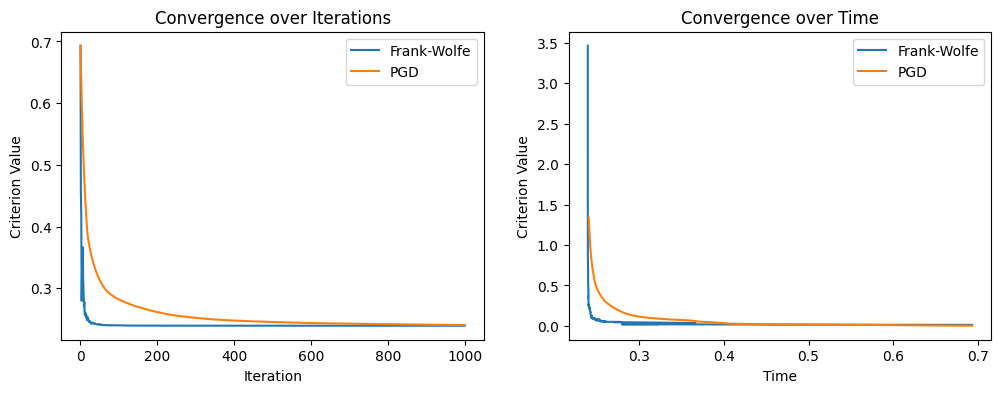

In [ ]:
# The dependence of the value of the criterion on the number of iterations
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(values_FW1)), values_FW1, label='Frank-Wolfe')
plt.plot(range(len(values_PGD)), values_PGD, label='PGD')
plt.xlabel("Iteration")
plt.ylabel("Criterion Value")
plt.title("Convergence over Iterations")
plt.legend()

# The dependence of the value of the criterion on time
plt.subplot(1, 2, 2)
plt.plot(values_FW1, times_FW1, label='Frank-Wolfe')
plt.plot(values_PGD, times_PGD, label='PGD')
plt.xlabel("Time")
plt.ylabel("Criterion Value")
plt.title("Convergence over Time")
plt.legend()

The Frank-Wolff method, in this case, demonstrates faster convergence to the desired accuracy compared to gradient descent with Euclidean projection. This suggests that, for the specific problem at hand, the Frank-Wolff method may be a more efficient optimization algorithm.